In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [14]:
len(X_train)

60000

In [15]:
len(X_test)

10000

In [16]:
X_train[0].shape

(28, 28)

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

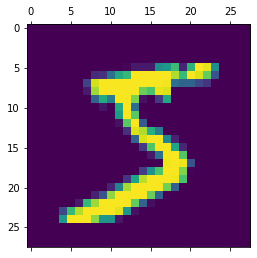

In [21]:
plt.matshow(X_train[0])

In [22]:
y_train[0]

5

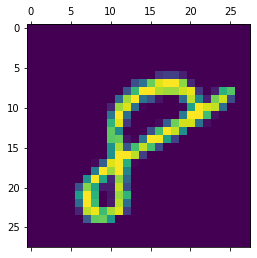

In [30]:
plt.matshow(X_train[59999])

In [31]:
y_train[59999]

8

In [32]:
X_train.shape

(60000, 28, 28)

In [39]:
X_train=X_train/255
X_test=X_test/255

In [40]:
x_train_flattened=X_train.reshape(len(X_train),28*28)
x_test_flattened=X_test.reshape(len(X_test),28*28)

In [41]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7328 - accuracy: 0.8119
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3126 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.9248


In [42]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9254


[0.26843199133872986, 0.9254000186920166]

In [43]:
y_pred=model.predict(x_test_flattened)

In [44]:
y_pred[0]

array([3.2733381e-02, 3.8019147e-07, 6.1063915e-02, 9.6004522e-01,
       3.6157072e-03, 8.8551134e-02, 1.5638504e-06, 9.9976504e-01,
       7.9348475e-02, 6.7020369e-01], dtype=float32)

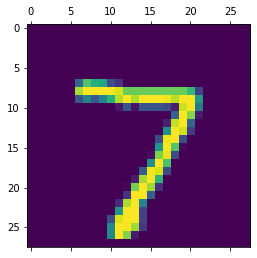

In [51]:
plt.matshow(X_test[0])

In [50]:
np.argmax(y_pred[0])

7

In [55]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [60]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    4,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,    9,  926,   18,    9,    2,   11,    9,   36,    5],
       [   5,    0,   21,  915,    1,   26,    2,    9,   21,   10],
       [   1,    1,    5,    1,  925,    0,    7,    3,    8,   31],
       [  12,    3,    4,   30,   11,  776,   13,    7,   31,    5],
       [  15,    3,    7,    1,    8,   12,  908,    2,    2,    0],
       [   1,    8,   24,    8,    9,    1,    0,  938,    1,   38],
       [   8,   11,    6,   20,    9,   26,    8,   10,  863,   13],
       [  11,    7,    1,   11,   33,    6,    0,   14,    5,  921]])>

Text(69.0, 0.5, 'Truth')

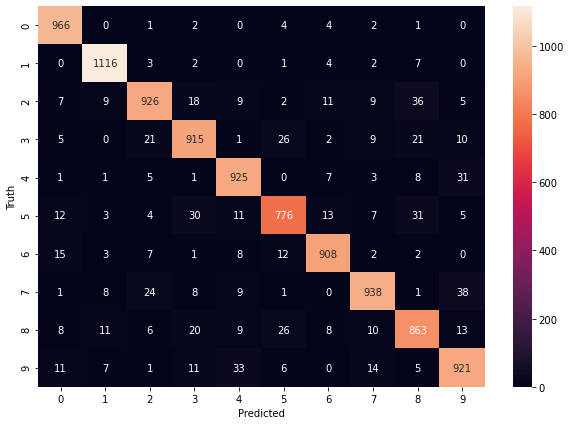

In [62]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [63]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4439 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1320 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0876 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0502 - accuracy: 0.9850


In [65]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9765


[0.07617973536252975, 0.9764999747276306]

Text(69.0, 0.5, 'Truth')

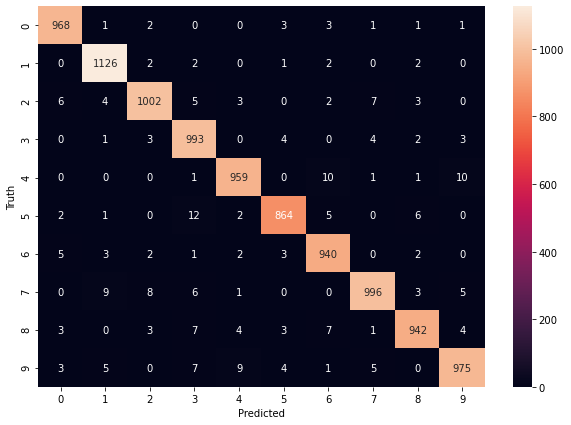

In [66]:
y_pred=model.predict(x_test_flattened)
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [68]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4558 - accuracy: 0.8744
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1320 - accuracy: 0.9605
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0879 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0644 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0395 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.017